In [10]:
import re
import pandas as pd
import numpy as np

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
import utils.ssvep_analysis as sa

In [11]:
file_path = '../data/2024-03-04-Gurke/Gurke_Deuteranomaly_0.0_multicolor-deuteranomaly-series_frequency_16.5_tile-size144_07ef0ee3-0a79-4cbb-ac58-2ee1ac698446.csv'
df = pd.read_csv(file_path, skiprows=10, header=None)

with open(file_path, 'r') as file:
    content = file.read()
    
match = re.search(r'Frequency:\s*(\d+(\.\d+)?)', content)
stimulus_frequency = float(match.group(1)) if match else None

eeg_data = df.to_numpy()[250:-250, 1:9].astype(float)
marker = df.to_numpy()[250:-250, -1].flatten()

sa.update_default_stimulus_frequency(stimulus_frequency)

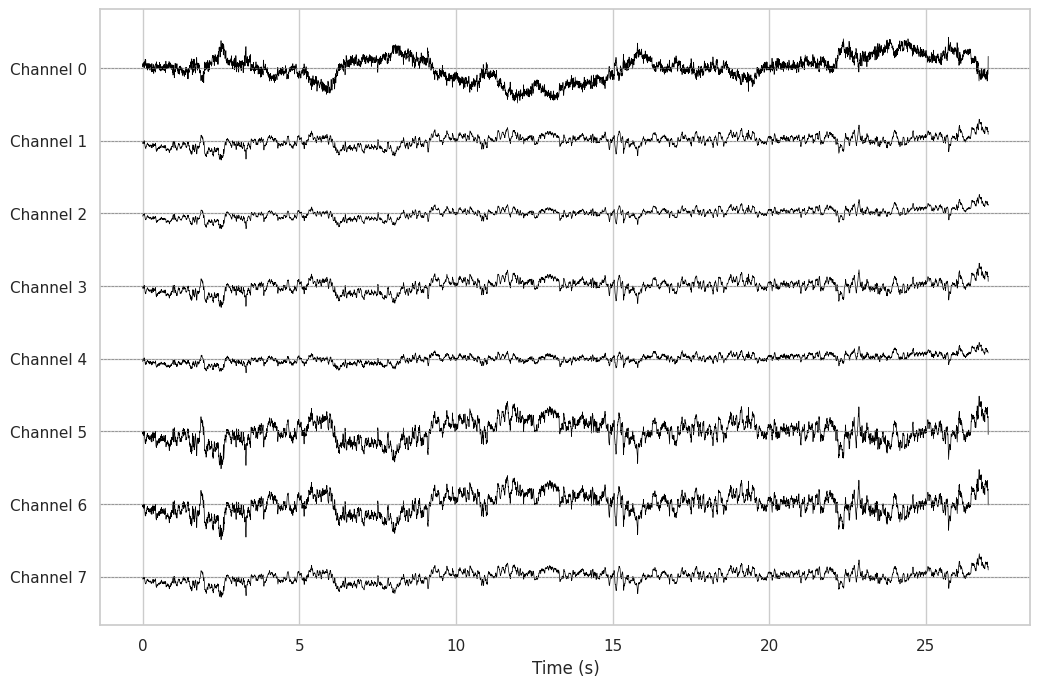

In [12]:
sa.plot_eeg(eeg_data);

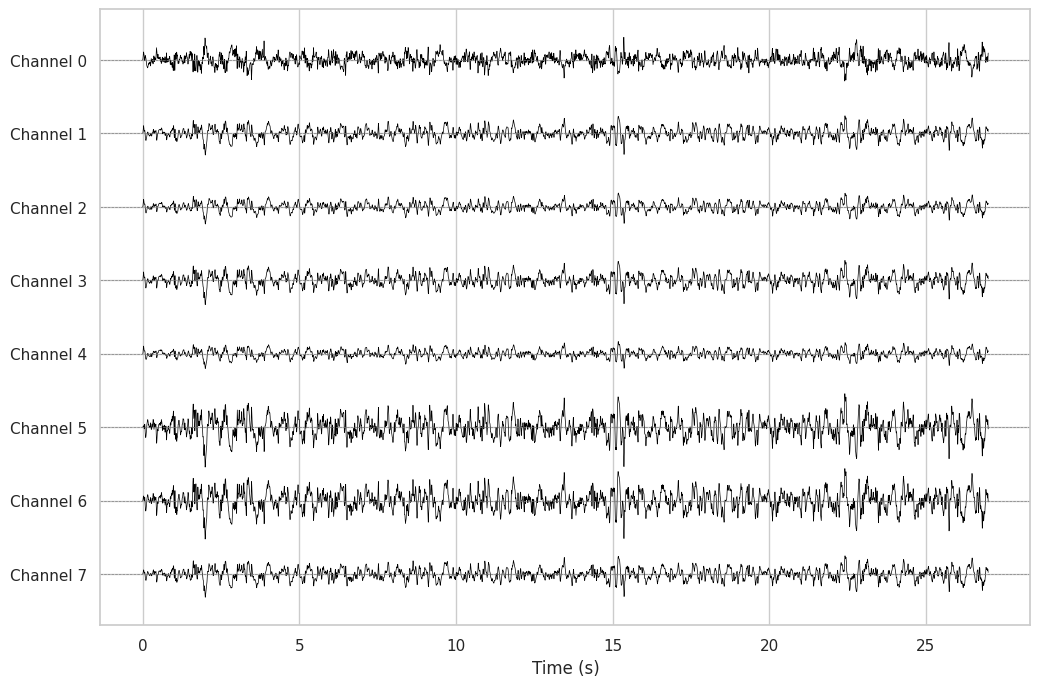

In [13]:
eeg_data = sa.remove_artefacts(eeg_data)
eeg_data = sa.apply_ransac_detrending(eeg_data)
eeg_data = sa.apply_lowpass_filter(eeg_data)
eeg_data = sa.apply_highpass_filter(eeg_data)
eeg_data = sa.apply_notch_filter(eeg_data)

sa.plot_eeg(eeg_data);

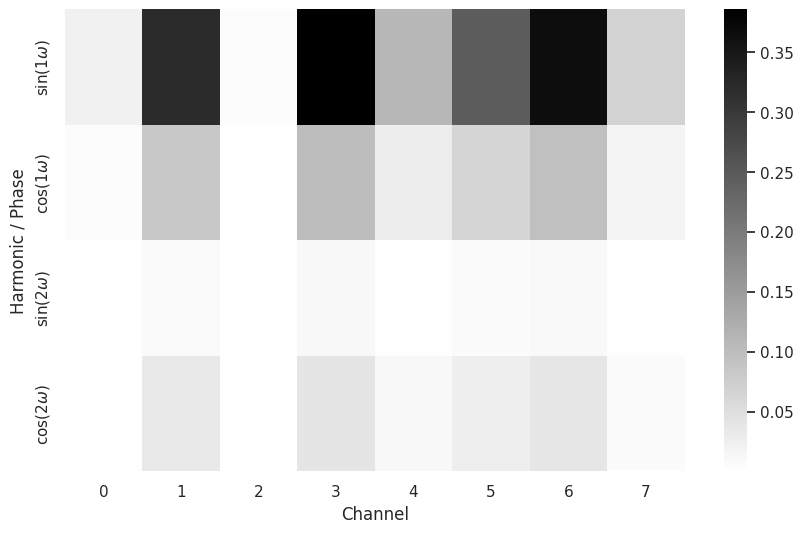

In [14]:
reduced_eeg_data, coefficient_matrix = sa.compute_reduced_signal(eeg_data)
sa.plot_coefficient_matrix(np.abs(coefficient_matrix));

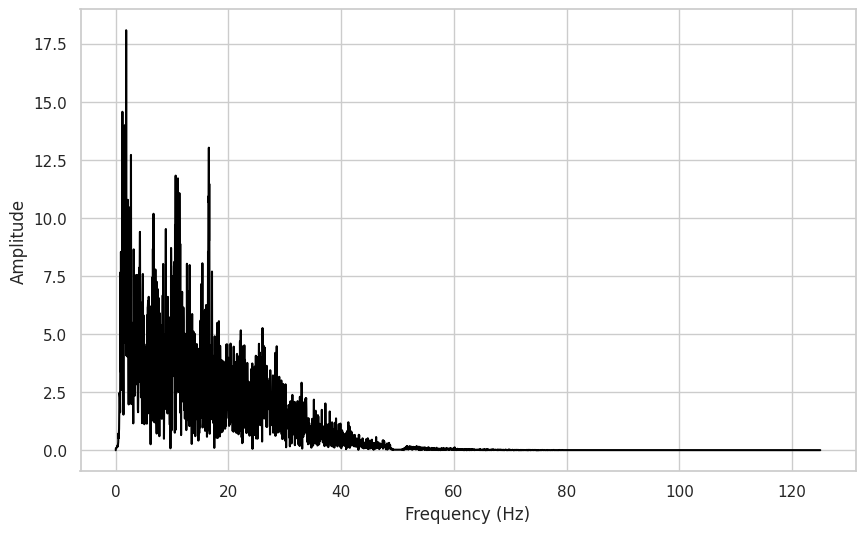

In [15]:
frequencies, spectrum = sa.compute_power_spectrum(reduced_eeg_data)
sa.plot_power_spectrum(frequencies, spectrum);

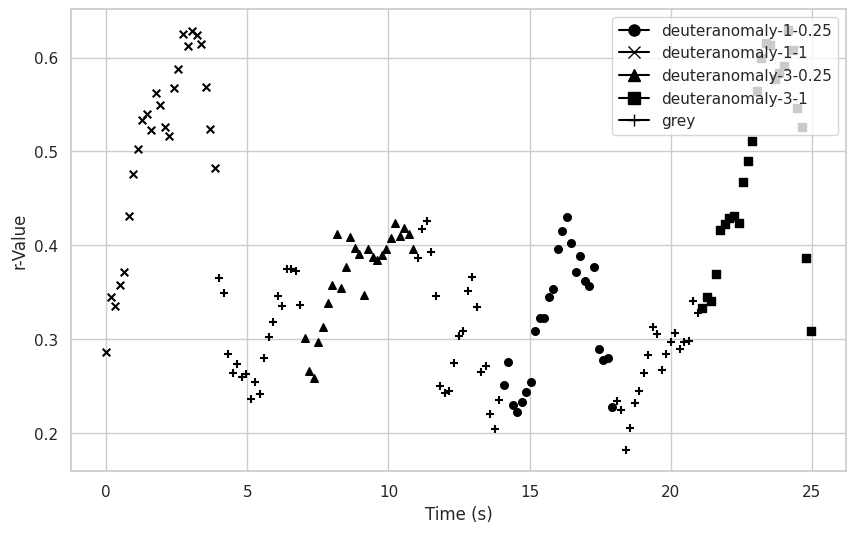

In [16]:
r_values, times, marker_values = sa.compute_running_r_values(eeg_data, marker)
sa.plot_r_values(r_values, times, marker_values);

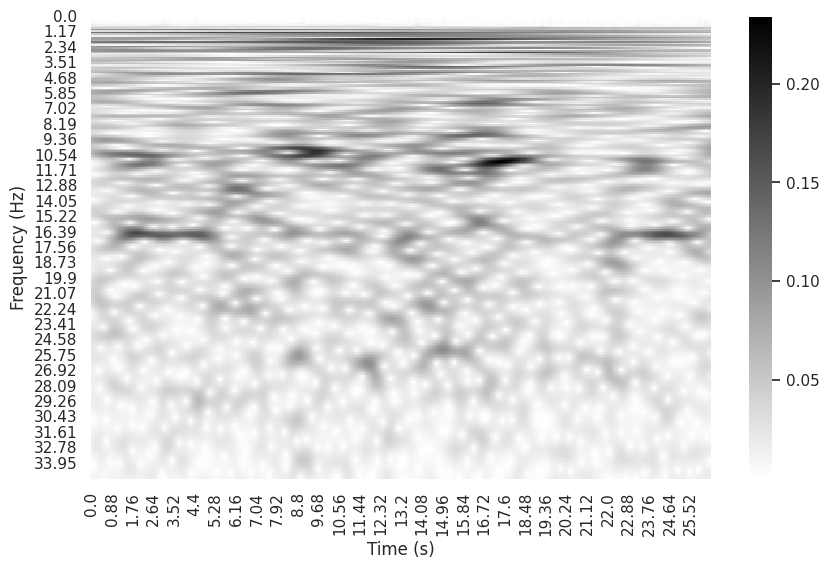

In [17]:
frequencies, times, cwt_matrix = sa.compute_wavelet_transform(reduced_eeg_data)
sa.plot_wavelet_transform(frequencies, times, np.abs(cwt_matrix));

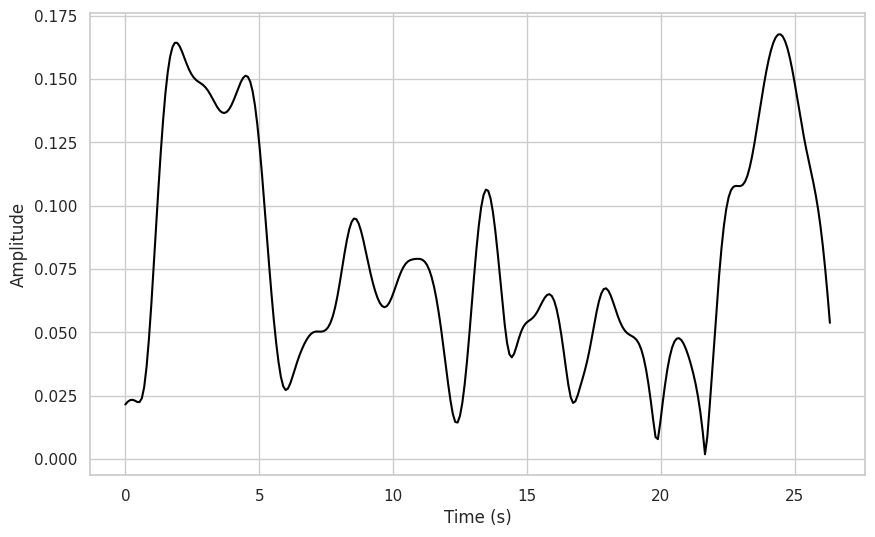

In [18]:
_, times, cwt = sa.compute_wavelet_transform(reduced_eeg_data, w=50, frequencies=np.array([stimulus_frequency]));
sa.plot_time_signal(times, np.abs(cwt.flatten()));